데이터 직군 연봉 예측

In [2]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [3]:
# ▶ pd.set option
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


> **데이터 살펴보기**
* 데이터 명세
* https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

|Column|Description|
|:---|:---|
|work_year| 급여를 지급한 해|
|experience_level|직무 경험수준 (EN : 주니어 / MI : 중급, SE : 시니어 레벨, 전문가 / EX : 임원급, 이사)|
|employment_type|고용 유형 (PT: 파트타임 / FT : 풀타임 / CT : 계약직 / FL : 프리랜서)|
|job_title|직무|
|salary|총 급여|
|salary_currency|통화 코드|
|salaryinusd|급여(USD)|
|employee_residence|근무 연도 중 거주 국가|
|remote_ratio|원격 근무 비율|
|company_location|회수 위치|
|company_size|당해 연도 평균 근무인원 (S : 50인 미만(소) / M : 50~250인(중) / L : 250인 이상(대))|





## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 데이터 직군 직원 채용 시 연봉 산정 어려움
```

> **기대효과**

```
▶ 채용 시 연봉 산정 베이스 라인 활용으로 원활한 채용 진행
```

> **해결방안**

```
▶ 지원자의 정보를 통해 데이터 직군 연봉 추정(예측)
 - Data 전처리 및 EDA
 - 가설을 수립하고 데이터를 통해 검증
 - MLP 활용 연봉 에측 모델링 수행
```


### · Data 전처리
---
* 수집된 데이터의 기본 정보들을 확인

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)

In [4]:
# ▶ Data 형태 확인
# ▶ 607 row, 12 col로 구성됨
print('df :', df.shape)

df : (607, 12)


In [5]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
# ▶ Null 값 확인
print(df.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
# ▶ Outlier 확인
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [8]:
# ▶ 필요 없는 변수 사전 제거
# ▶ 범용적으로 사용할 수 있는 salary_in_usd col만 사용
df = df.drop(['Unnamed: 0', 'salary_currency', 'salary'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [9]:
# ▶ 숫자형, 범주형 변수 분할
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("categorical_list :", categorical_list)
print("numerical_list :", numerical_list)

categorical_list : ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
numerical_list : ['work_year', 'salary_in_usd', 'remote_ratio']


In [10]:
# ▶ 범주형 변수 유니크 값 출력
list_of_df = []

for var in categorical_list :
  loop_df = pd.DataFrame({'var':[var], 'ncnt':[df[var].nunique()]})
  list_of_df.append(loop_df)

df_concat = pd.concat(list_of_df).reset_index(drop=True)
df_concat

,var,ncnt
0,experience_level,4
1,employment_type,4
2,job_title,50
3,employee_residence,57
4,company_location,50
5,company_size,3


In [11]:
# ▶ job_title 살펴보기
# job_title 열의 값 개수를 계산하고 DataFrame으로 변환
df_job = pd.DataFrame(df['job_title'].value_counts()).reset_index()
df_job.columns = ['job_title', 'count']  # 열 이름 지정
df_job.head(10)

,job_title,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Principal Data Scientist,7


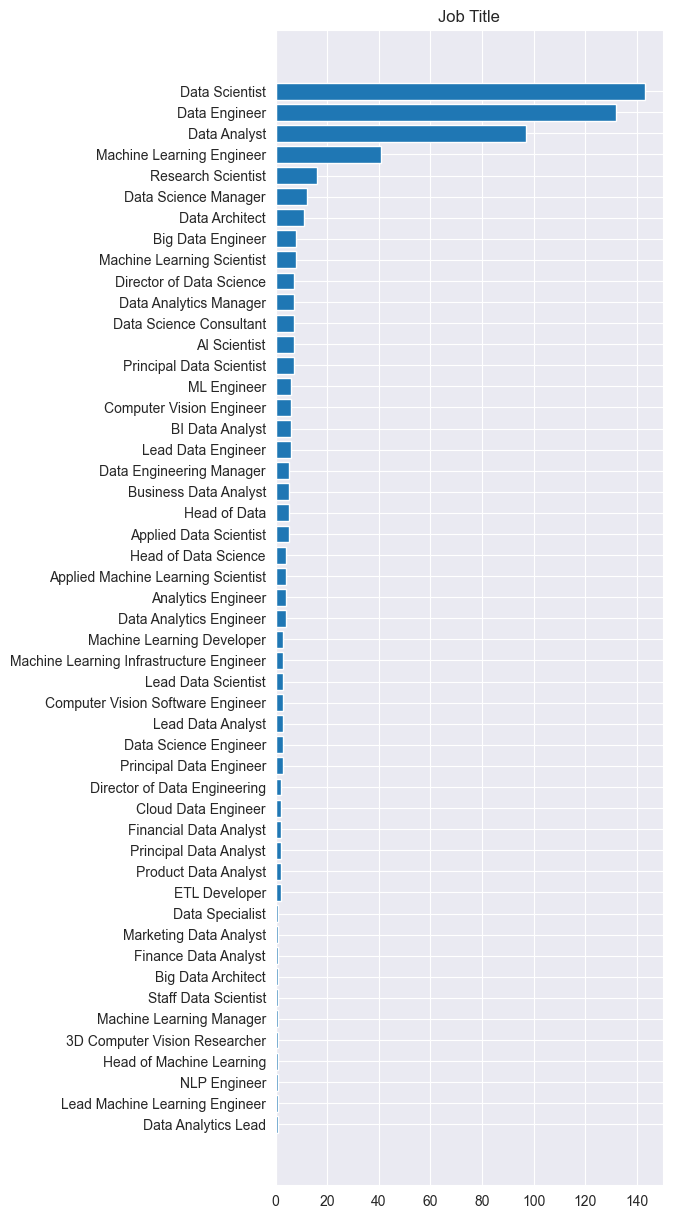

In [12]:
from matplotlib import pyplot as plt

#df_job = pd.DataFrame(df['job_title'].value_counts()).reset_index()
#df_job.columns = ['job_title', 'count']  # 컬럼 이름 지정

# 오름차순 정렬
df_job = df_job.sort_values(by=['count'])

fig = plt.figure(figsize=(5, 15))
plt.title('Job Title')
plt.barh(df_job['job_title'], df_job['count'])  # 수정된 부분
plt.show()

# 가설설정
### · ① 연도가 증가할 수록 연봉이 상승할 것이다.
---

In [13]:
# ▶ 데이터 확인
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [14]:
# ▶ 연도 별 평균 연봉 계산
df_work_year = pd.DataFrame(df.groupby('work_year')['salary_in_usd'].mean()).reset_index()
df_work_year

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


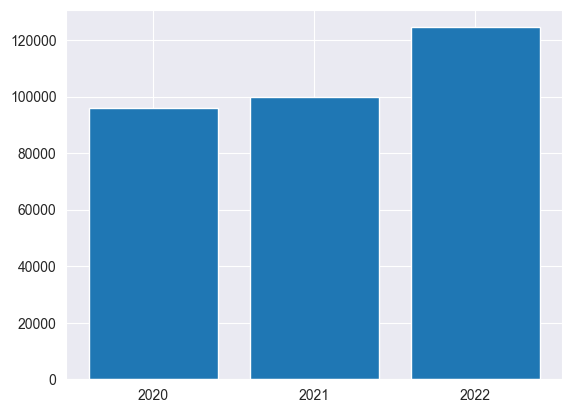

In [15]:
# ▶ 연도 별 평균 연봉 시각화
plt.bar(df_work_year['work_year'].astype(str), df_work_year['salary_in_usd']);

In [16]:
df['job_title'].head()

0                Data Scientist
1    Machine Learning Scientist
2             Big Data Engineer
3          Product Data Analyst
4     Machine Learning Engineer
Name: job_title, dtype: object

In [17]:
# ▶ Top 3 직군별 연봉 비교 분석
top3 = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_top3 = pd.DataFrame(df[df['job_title'].isin(top3)].groupby(['work_year', 'job_title'])['salary_in_usd'].mean())
df_top3.reset_index(inplace=True)
df_top3

,work_year,job_title,salary_in_usd
0,2020,Data Analyst,45547.285714
1,2020,Data Engineer,88162.000000
2,2020,Data Scientist,85970.523810
3,2021,Data Analyst,79505.411765
4,2021,Data Engineer,83202.531250
5,2021,Data Scientist,70671.733333
6,2022,Data Analyst,100550.739726
7,2022,Data Engineer,126375.696629
8,2022,Data Scientist,136172.090909


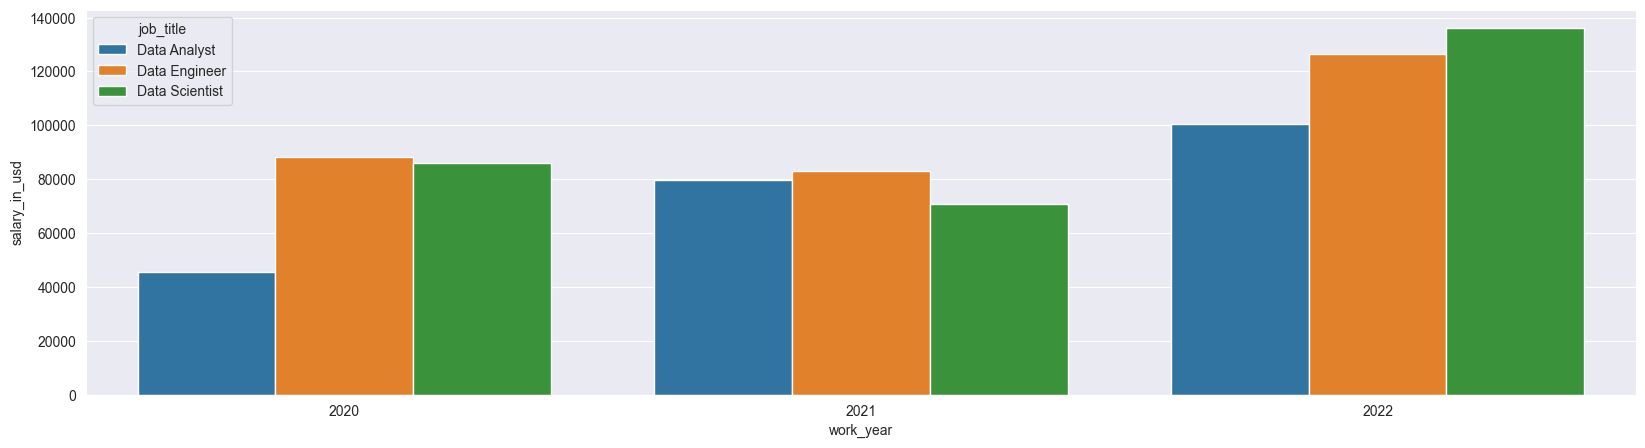

In [18]:
# ▶ 연도 별 평균 연봉 시각화
# ▶ DS가 치고 올라왔다.
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.barplot(x=df_top3['work_year'].astype(str), y=df_top3['salary_in_usd'], hue='job_title', data=df_top3);

In [19]:
# ▶ 상승률 비교
import pandas as pd
df_top3_ratio = pd.pivot_table(df_top3, index=['job_title'], columns=['work_year'], values=['salary_in_usd']).reset_index()
df_top3_ratio

job_title salary_in_usd                             
work_year                          2020          2021           2022
0            Data Analyst  45547.285714  79505.411765  100550.739726
1           Data Engineer  88162.000000  83202.531250  126375.696629
2          Data Scientist  85970.523810  70671.733333  136172.090909

In [20]:
# ▶ multi index 해제
df_top3_ratio.columns = ['job_title', '2020_s', '2021_s', '2022_s']
df_top3_ratio

,job_title,2020_s,2021_s,2022_s
0,Data Analyst,45547.285714,79505.411765,100550.739726
1,Data Engineer,88162.000000,83202.531250,126375.696629
2,Data Scientist,85970.523810,70671.733333,136172.090909


In [21]:
# ▶ multi index 해제
df_top3_ratio['s_i_rate_1st'] = round((df_top3_ratio['2021_s']-df_top3_ratio['2020_s']) / df_top3_ratio['2020_s']* 100,2)
df_top3_ratio['s_i_rate_2nd'] = round((df_top3_ratio['2022_s']-df_top3_ratio['2021_s']) / df_top3_ratio['2021_s']* 100,2)
df_top3_ratio['s_i_rate_total'] = round((df_top3_ratio['2022_s']-df_top3_ratio['2020_s']) / df_top3_ratio['2020_s']* 100,2)
df_top3_ratio

,job_title,2020_s,2021_s,2022_s,s_i_rate_1st,s_i_rate_2nd,s_i_rate_total
0,Data Analyst,45547.285714,79505.411765,100550.739726,74.56,26.47,120.76
1,Data Engineer,88162.000000,83202.531250,126375.696629,-5.63,51.89,43.34
2,Data Scientist,85970.523810,70671.733333,136172.090909,-17.80,92.68,58.39


# 가설 설정
### · ② 근무 지역은 연봉에 큰 영향을 미치지 않을 것이다.

In [22]:
#  ▶ top 10 만 출력
top_10_residence = ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT']

df_top_10_res = pd.DataFrame(df[df['employee_residence'].isin(top_10_residence)].groupby('employee_residence')['salary_in_usd'].mean()).reset_index()
df_top_10_res

,employee_residence,salary_in_usd
0,CA,97085.310345
1,DE,85552.560000
2,ES,57593.400000
3,FR,59886.611111
4,GB,81403.159091
5,GR,56331.230769
6,IN,37322.333333
7,JP,103537.714286
8,PT,42862.500000
9,US,149194.117470


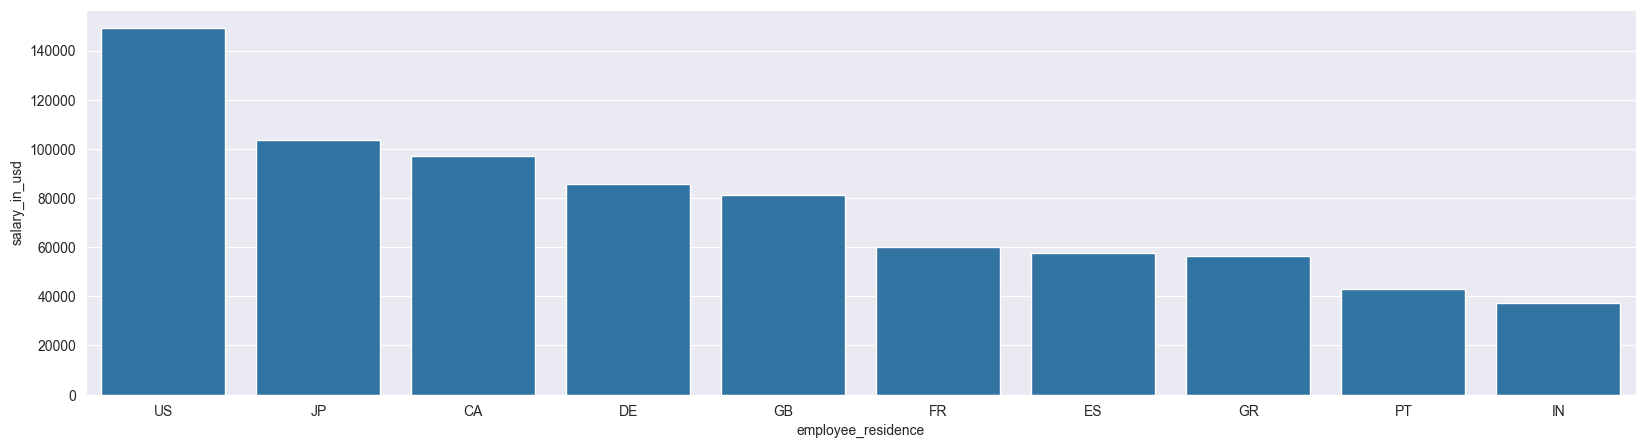

In [23]:
# ▶ Sorting
# ▶ US(미국), JP(일본), CA(캐나다), DE(독일), GB(영국), FR(프랑스), ES(스페인), GR(그리스), PT(포르투갈), IN(인도)
df_top_10_res = df_top_10_res.sort_values(by=['salary_in_usd'], ascending = False)
plt.figure(figsize=(20, 5))
sns.barplot(x=df_top_10_res['employee_residence'].astype(str), y=df_top_10_res['salary_in_usd'], data=df_top_10_res);

# MLP 모델링
### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [24]:
# ▶ 범주형 변수를 모델이 이해하기 위한 숫자현 데이터로 변환(OneHotEncoder)
# ▶ 범주형 변수의 Level이 예제와 같이 많다고 하면, 다른 인코딩 방법을 고려해 볼 수 도 있음 ex) Binary encoding, Hash encoding 등
# ▶ 완벽한 정답은 없음, 모든 방법을 테스트해 보고 성능을 고려하는 것이 Best
from sklearn.preprocessing import OneHotEncoder

for col in categorical_list:
    encoder = OneHotEncoder()
    onehot = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray(),
                          columns=encoder.get_feature_names_out([col]))
    # 기존 컬럼 삭제 후 새로운 OneHot 컬럼 추가
    df = pd.concat([df, onehot], axis=1).drop(columns=[col])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# ▶ Pytorch libraries import
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X=df.drop(['work_year', 'salary_in_usd'], axis=1)
Y=df['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [26]:
# ▶ 딥러닝에서 Scaling을 하는 이유
# 1) 학습 시에 미치는 중요도 일반화
# 2) Gradient descent 사용할 때 수렴 속도를 높임
# 3) 시그모이드 함수와 같은 활성 함수를 사용할 때, saturation현상(가중치 업데이트 X)이 빨리 일어나지 않도록 도와줌
# 4) Local Minimum에 빠질 위험을 감소 시킴
scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train.values)
x_test =  scaler.transform(x_test.values)

In [27]:
x_train

array([[0.5, 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [1. , 0. , 0. , ..., 0. , 1. , 0. ],
       [1. , 1. , 0. , ..., 0. , 0. , 1. ]], shape=(485, 169))

In [28]:
# ▶ torch.from_numpy 함수를 통해 데이터를 torch에서 인식할 수 있는 tesnor 형태로 변환
# ▶ ravel() : 다차원 배열을 1차원에 배열로 평탄화
x_tensor =  torch.from_numpy(x_train).float()
y_tensor =  torch.from_numpy(y_train.values.ravel()).float()
xtest_tensor =  torch.from_numpy(x_test).float()
ytest_tensor =  torch.from_numpy(y_test.values.ravel()).float()

print("[Train set Tensors] \n")
print(x_tensor)
print(y_tensor)
print("\n[Test set Tensors] \n")
print(xtest_tensor)
print(ytest_tensor)

[Train set Tensors] 

tensor([[0.5000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [1.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]])
tensor([ 46759., 112900., 450000., 152000., 136600., 100000.,  90000.,   8000.,
         12901., 100000., 185100., 276000.,  18442.,  69336., 109000.,  61300.,
         50000., 120000., 110000., 168000., 175000.,  87932., 113000.,  63831.,
        180000.,  37236.,  82528., 256000., 130000., 145000.,  75000., 120000.,
        141300., 235000.,  91614., 115000., 132320.,  86703.,  45618., 130026.,
         80000.,  50000., 148261.,  72500.,  71786., 170000., 130000.,  82528.,
         77684.,  61300., 130000.,  87932.,  42000.,  20000.,  63810., 241000.,
         37300.,  90

### · Dataset 및 DataLoader 생성
---
* DL을 위한 PyTorch Dataset 및 DataLoader 생성




In [29]:
# ▶ 배치 사이즈 선정 (batch, iteration, epoch 개념 숙지)
# 1) batch : 한 번에 학습시킬 데이터의 양
# 2) epoch : 전체 학습 셋이 신경망을 통과한 횟수
# 3) iteration : 1-epoch를 마치는데 필요한 batch 개수

# ▶ 배치 사이즈 선정
bs = 10

# ▶ y_tensor가 1차원인 경우에만 unsqueeze(1) 호출
if len(y_tensor.shape) == 1:
    y_tensor = y_tensor.unsqueeze(1)

# ▶ Train Dataset 생성
train_ds = TensorDataset(x_tensor, y_tensor)
train_dl = DataLoader(train_ds, batch_size=bs)

# ▶ ytest_tensor가 1차원인 경우에만 unsqueeze(1) 호출
if len(ytest_tensor.shape) == 1:
    ytest_tensor = ytest_tensor.unsqueeze(1)

# ▶ Test Dataset 생성
test_ds = TensorDataset(xtest_tensor, ytest_tensor)
test_loader = DataLoader(test_ds, batch_size=bs)

In [30]:
# ▶ 차원의 수를 맞춰주기 위해 unsqueeze(1) 사용
x_tensor.shape, y_tensor.shape

(torch.Size([485, 169]), torch.Size([485, 1]))

# 인공신경망 구성


In [31]:
n_input_dim = x_train.shape[1]

class Regressor(nn.Module):
    # ▶ 사용하기 위한 기본 함수들을 사전의 정의(self)
    def __init__(self):
        super(Regressor,self).__init__()
        self.fc1 = nn.Linear(n_input_dim, 300, bias=True) # 첫 번째 레이어
        self.fc2 = nn.Linear(300, 100, bias=True) # 두 번째 레이어
        self.fc3 = nn.Linear(100, 1, bias=True) # 출력 레이어
        self.relu = nn.ReLU() # 활성화 함수 ( 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환함.)
        self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다

    # ▶ 순전파(forward network) 구성, forward process만 구성하면 backword는 자동을 구성됨(autograd, 자동미분)
    def forward(self, x):
        x = self.relu(self.fc1(x)) # 활성화 함수 적용
        x = self.dropout(self.relu(self.fc2(x))) # 은닉층에서 전달할 때, 50% 를 dropout(Connection을 무작위 drop, overfitting 방지)
        x = self.relu(self.fc3(x))
        return x

model = Regressor()
print(model)

Regressor(
  (fc1): Linear(in_features=169, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [32]:
model = Regressor()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
#weight decay : L2 정규화에서 패널티 계수를 의미함. 클수록 제약조건 강함, 람다(λ)
epochs = 100

### · 모델 학습 및 평가
---
* 딥러닝 모델 학습 및 평가

In [33]:
model.train()
train_loss = []
# n = len(train_dl)

for epoch in range(epochs):                 # ▶100번 반복 학습
    running_loss =0.0                       # ▶ 매 에폭의 평균 loss 구하기 위해서 초기값 0으로
    for data in train_dl:                   # ▶ 각 배치를 불러온다
        inputs, values = data               # ▶ x, y data split
        optimizer.zero_grad()               # ▶ 한번에 학습이 끝면 gradients를 항상 0으로 만들어줘야 함
        outputs = model(inputs)             # ▶ 예측값 산출
        loss = loss_func(outputs, values)   # ▶ 손실함수 계산 및 최적화
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss/len(train_dl) # ▶ 1-epoch 내에 모든 iteration의 Loss의 평균값을 구함
    print("Loss in epoch :"+str(epoch)+" is: "+str(epoch_loss))
    train_loss.append(epoch_loss)
print('Last iteration loss value: '+ str(loss.item()))

Loss in epoch :0 is: 17647962906.122448
Loss in epoch :1 is: 17621716971.10204
Loss in epoch :2 is: 17483375427.918365
Loss in epoch :3 is: 17108546936.163265
Loss in epoch :4 is: 16389061234.938776
Loss in epoch :5 is: 15224663896.816326
Loss in epoch :6 is: 13621070795.755102
Loss in epoch :7 is: 11799100907.102041
Loss in epoch :8 is: 9845392080.979591
Loss in epoch :9 is: 7805365686.857142
Loss in epoch :10 is: 6429842364.081633
Loss in epoch :11 is: 5313735909.877551
Loss in epoch :12 is: 4692658855.183674
Loss in epoch :13 is: 4304634992.32653
Loss in epoch :14 is: 4052179732.897959
Loss in epoch :15 is: 3918606814.0408163
Loss in epoch :16 is: 3777830594.612245
Loss in epoch :17 is: 3797084431.6734695
Loss in epoch :18 is: 3656557594.122449
Loss in epoch :19 is: 3638460401.632653
Loss in epoch :20 is: 3728209619.591837
Loss in epoch :21 is: 3591999844.571429
Loss in epoch :22 is: 3516273266.9387755
Loss in epoch :23 is: 3467307465.142857
Loss in epoch :24 is: 3461930108.0816326


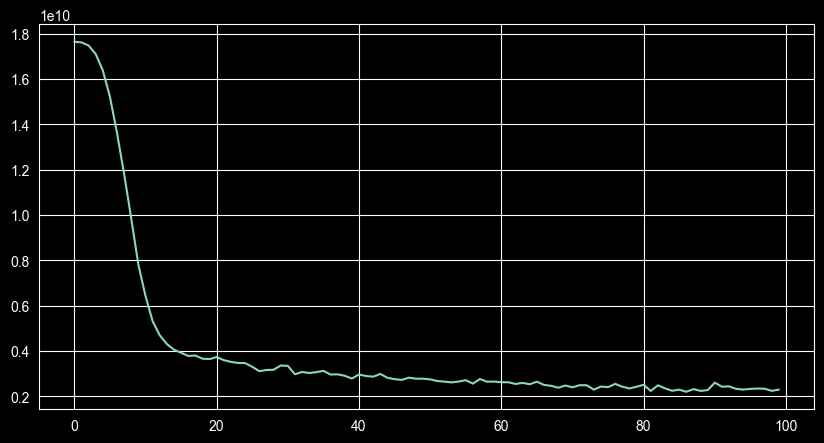

In [34]:
# ▶ train loss 출력
plt.style.use(['dark_background'])

plt.plot(train_loss)
plt.gcf().set_size_inches(10 ,5)
plt.show();

In [35]:
predictions = torch.tensor([], dtype=torch.float) # ▶ 예측값 저장을 위한 빈 텐서
actual = torch.tensor([], dtype=torch.float) # ▶ 실제값 저장을 위한 빈 텐서


with torch.no_grad(): # ▶requires_grad 비활성화
    model.eval() # ▶ dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

    # ▶ 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
    for data in test_loader:
        inputs, values = data
        outputs = model(inputs)

        # ▶ torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
        predictions = torch.cat((predictions, outputs), 0)
        actual = torch.cat((actual, values), 0)

predictions = predictions.numpy()
actual = actual.numpy()

In [36]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(list(predictions.squeeze()), list(actual.squeeze())))

np.float64(52274.26580425419)

In [38]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

def evaluation(dataloader):

    predictions = torch.tensor([], dtype=torch.float) # ▶ 예측값 저장을 위한 빈 텐서
    actual = torch.tensor([], dtype=torch.float) # ▶ 실제값 저장을 위한 빈 텐서
    with torch.no_grad(): # ▶ requires_grad 비활성화
        model.eval() # ▶ dropout과 같은 모델 학습시에만 사용하는 기법들을 비활성화

        # ▶ 배치 단위로 데이터를 예측하고 예측값과 실제값을 누적해서 저장
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            # ▶ torch.cat : 원하는 dimension방향으로 텐서를 나란하게 쌓아주는 기능 0(아래쪽), 1(오른쪽)
            predictions = torch.cat((predictions, outputs), 0)
            actual = torch.cat((actual, values), 0)

    predictions = predictions.numpy()
    predictions = list(predictions.squeeze())

    actual = actual.numpy()
    actual = list(actual.squeeze())

    rmse = np.sqrt(mean_squared_error(predictions, actual))
    r2 = r2_score(actual, predictions)

    return rmse, r2


train_rmse, train_r2 = evaluation(train_dl)
test_rmse, test_r2 = evaluation(test_loader)

print('학습용 셋(rmse) :', train_rmse, '/ 학습용 셋(r2) :', train_r2)
print('테스트 셋(rmse) :', test_rmse, '/ 테스트 셋(r2) :', test_r2)

학습용 셋(rmse) : 44756.902507250736 / 학습용 셋(r2) : 0.5928696303847183
테스트 셋(rmse) : 52274.26580425419 / 테스트 셋(r2) : 0.49807692254718505
